In [19]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from joblib import dump,load

In [20]:
data = pd.read_pickle('AgesAndHeights.pkl')
data.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


c:\Users\jaidi\OneDrive\Documents\GitHub\Python-Flask-ML-App\.env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\jaidi\OneDrive\Documents\GitHub\Python-Flask-ML-App\.env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



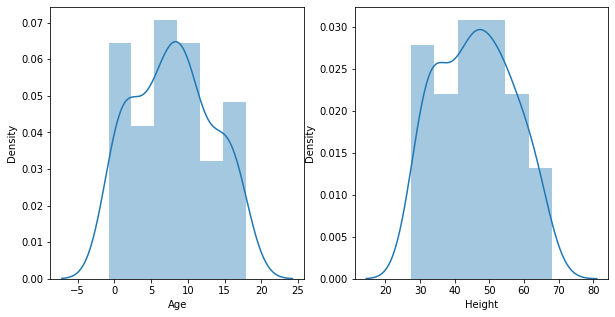

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(data.Age, ax = plt.subplot(1,2,1))
sns.distplot(data.Height, ax = plt.subplot(1,2,2))
plt.show()

,Age,Height
13,-0.163532,28.647834
20,-0.683017,29.883928
25,-0.146392,32.830922
30,-0.780853,31.960807
36,-0.087958,27.332513
59,-0.548488,30.801346
91,-0.328780,27.819052


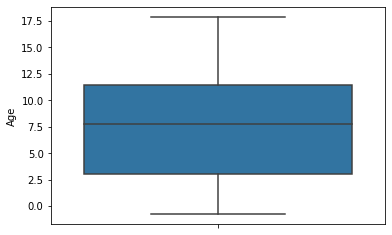

In [22]:
sns.boxplot(y = (data.Age))
data[data.Age < 0]
# Ages has negative values

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>]], dtype=object)

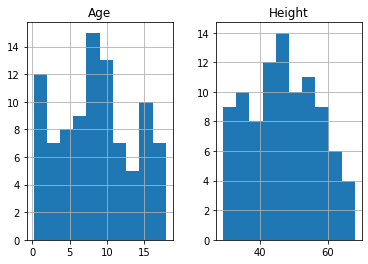

In [23]:
# Lets get only the positive ages
data = data[data.Age > 0]
data.hist()

c:\Users\jaidi\OneDrive\Documents\GitHub\Python-Flask-ML-App\.env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age', ylabel='Height'>

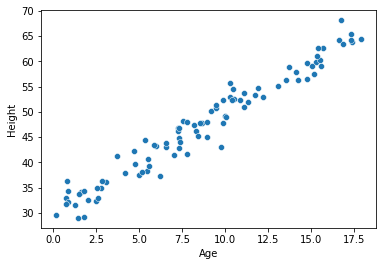

In [24]:
sns.scatterplot(data.Age, data.Height)

In [25]:
fig = px.scatter(x = data.Age, y = data.Height, title= "Heights vs Age of the People", labels= { 'x' : 'Age (Years)', 'y' : 'Height (inches)' })
fig.show()

In [26]:
ages_np = data.Age.values
heights_np = data.Height.values

ages_np = ages_np.reshape(-1,1)

In [27]:
model = LinearRegression()
model.fit(ages_np, heights_np)
model.coef_

array([2.0014169])

In [35]:
x_new = np.arange(19).reshape(-1,1)
preds = model.predict(x_new)

fig = px.scatter(x = data.Age, y = data.Height, title= "Heights vs Age of the People", labels= { 'x' : 'Age (Years)', 'y' : 'Height (inches)' })
fig.add_trace(go.Scatter(x = x_new.reshape(-1), y = preds, mode= 'lines', name='Model'))
fig.write_image('base_img.svg', width = 800)
fig.show()

In [29]:
dump(model, 'model.joblib')

['model.joblib']

In [30]:
model_in = load('model.joblib')
model_in.coef_

array([2.0014169])

In [33]:
def make_pic(training_data_file_name, model, new_ip_np_arr, output_file):
    data = pd.read_pickle(training_data_file_name)
    data = data[data.Age > 0]
    x_new = np.array(list(range(19))).reshape(-1, 1)
    preds = model.predict(x_new)
    fig = px.scatter(x = data.Age, y = data.Height, title= "Heights vs Age of the People", labels= { 'x' : 'Age (Years)', 'y' : 'Height (inches)' })
    fig.add_trace(go.Scatter(x = x_new.reshape(-1), y = preds, mode= 'lines', name='Model'))
    new_pred = model.predict(new_ip_np_arr)
    fig.add_trace(go.Scatter(x=new_ip_np_arr.reshape(-1), y = new_pred, name = 'New o/p', mode='markers', marker=dict(color='purple', size=20, line=dict(color='purple', width=2))))
    fig.write_image(output_file, width = 800)
    fig.show()
    
def float_string_to_arr(float_str):
    def isfloat(s):
        try:
            float(s)
            return True
        except:
            return False
    return np.array([float(elem) for elem in float_str.split(',') if isfloat(elem)]).reshape(-1, 1)

In [34]:
make_pic('AgesAndHeights.pkl', model_in, float_string_to_arr('2, 3, 4'), 'output.svg')

array([[2.],
       [3.],
       [4.]])